In [6]:
import h5py
from transformers import DistilBertTokenizer
import matplotlib.pyplot as plt
from tqdm import tqdm

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Path to the h5py file
file_path = '/Users/imack/transfer/phishing_output.h5'

with h5py.File(file_path, 'r') as h5_file:
    html_content_dataset = h5_file['dev/html_content']
    
    token_lengths = []
    
    for idx in tqdm(range(len(html_content_dataset)), desc=f'Tokenizing', unit='entry'):
        content = html_content_dataset[idx]
        token_lengths.append(len(tokenizer.tokenize(str(content.decode('utf-8')))))


/opt/homebrew/Caskroom/miniforge/base/envs/phishing-edge/lib/python3.10/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Tokenizing: 100%|██████████| 7126/7126 [1:00:56<00:00,  1.95entry/s]


110821.5846197025
88881.57219781778


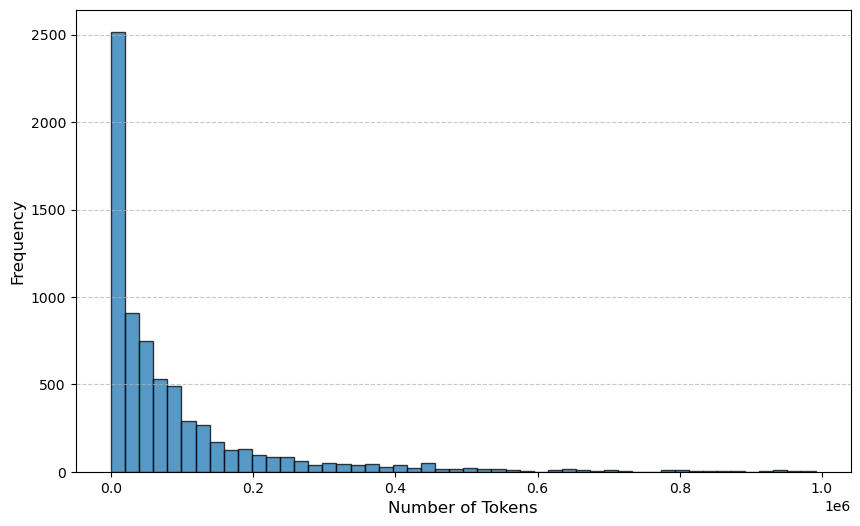

In [12]:
import numpy as np
print(sum(token_lengths)/len(token_lengths))
token_lengths_np = np.array(token_lengths)
filtered_lengths = token_lengths_np[token_lengths_np <= 1000_000]
print(sum(filtered_lengths)/len(filtered_lengths))

plt.figure(figsize=(10, 6))
plt.hist(filtered_lengths, bins=50, alpha=0.75, edgecolor='black')
plt.xlabel("Number of Tokens", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [1]:
import h5py
from transformers import DistilBertTokenizer
import matplotlib.pyplot as plt
from tqdm import tqdm

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

file_path = '/Users/imack/transfer/phishing_output.h5'

with h5py.File(file_path, 'r') as h5_file:
    html_content_dataset = h5_file['dev/urls']
    
    token_lengths = []
    
    for idx in tqdm(range(len(html_content_dataset)), desc=f'Tokenizing', unit='entry'):
        content = html_content_dataset[idx]
        token_lengths.append(len(tokenizer.tokenize(str(content.decode('utf-8')))))


/opt/homebrew/Caskroom/miniforge/base/envs/phishing-edge/lib/python3.10/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Tokenizing: 100%|██████████| 7126/7126 [00:00<00:00, 8178.92entry/s]


In [8]:
print(sum(token_lengths)/len(token_lengths))

plt.figure(figsize=(10, 6))
plt.hist(token_lengths, bins=50, alpha=0.75, edgecolor='black')
plt.xlabel("Number of Tokens", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

110821.5846197025


TypeError: '<=' not supported between instances of 'list' and 'int'